# EDA "How much did it rain"

The data set consists of NEXRAD radar observations and MADIS data collected during the first 8 days of April to November 2013 and 2014 in corn-growing US Midwestern states. The data includes various measurements such as composite reflectivity, hydrometeor type, differential phase (Kdp), rainfall rates estimated by different algorithms, and the radar quality index, among others.


### Introduction

This notebook focuses on exploratory data analysis of the “How much did it rain?” data set. The goal is to predict the cumulative amount of rainfall in an hour given polarimetric radar observations and derived amounts at a location. This analysis will help us better understand the characteristics of the data, identify possible outliers, missing values, and the distribution of the variables.


## Data set description

The data set consists of NEXRAD radar observations and MADIS data collected during the first 8 days of April to November 2013 and 2014 in corn-growing US Midwestern states. The data includes various measurements such as composite reflectivity, hydrometeor type, differential phase (Kdp), rainfall rates estimated by different algorithms, and the radar quality index, among others.

### Data set columns

- `TimeToEnd`: Minutes remaining until the end of the radar observation time.
- `DistanceToRadar`: Distance between the radar and the rain gauge.
- `Composite`: Maximum reflectivity in the vertical volume above the rain gauge.
- `HybridScan`, `HydrometeorType`, `Kdp`, `RR1`, `RR2`, `RR3`, `RadarQualityIndex`, `Reflectivity`, `ReflectivityQC`, `RhoHV`, `Velocity`, `Zdr`, ` LogWaterVolume`, `MassWeightedMean`, `MassWeightedSD`: Various measurements related to radar observations and rainfall rate estimates.
- `Expected`: Actual amount of rain reported by the rain gauge for that time.

cuando hiciste el codigo para los subplots hay un problema y es que recuerda que solo tenemos las columnas que ya te habia dicho, no una de temperatura, toca cambiar ese codigo de las graficas y hacer las que si son, junto con el texto en ingles para elnotebook

## Libraries

For this analysis, we will use standard data analysis and visualization libraries such as `numpy`, `pandas`, `seaborn`, and `matplotlib`, as well as `sklearn` and `xgboost` for preliminary modeling.

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING other libraires which will be used
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier

## Charge data

We load the datasets `train_2013.csv` and `test_2014.csv`, which contain the training and test observations respectively.


In [2]:
train=pd.read_csv("Data/train_2013.csv")
test=pd.read_csv("Data/test_2014.csv")

print("Training Size : (%d,%d)"%train.shape)
print("Test Size : (%d,%d)"%test.shape)

Training Size : (1126694,20)
Test Size : (630452,19)


## Understand the data

We performed a preliminary exploration to understand the structure of the data, including the first rows of the data sets, descriptive statistics, and the sum of null values.


In [3]:
# Preliminary exploration

print(train.head())
print(train.describe())
print(train.isnull().sum())

   Id                                          TimeToEnd  \
0   1              56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0   
1   2                       58.0 48.0 38.0 29.0 19.0 9.0   
2   3                                          59.0 20.0   
3   4                       53.0 43.0 34.0 24.0 14.0 5.0   
4   5  56.0 52.0 43.0 59.0 54.0 48.0 42.0 36.0 31.0 5...   

                                     DistanceToRadar  \
0            30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0   
1                      77.0 77.0 77.0 77.0 77.0 77.0   
2                                          75.0 75.0   
3                      21.0 21.0 21.0 21.0 21.0 21.0   
4  69.0 69.0 69.0 83.0 83.0 83.0 83.0 83.0 83.0 5...   

                                           Composite  \
0  -99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...   
1  -99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...   
2                                  -99900.0 -99900.0   
3  -99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...   
4  23.0 24.0 22.0 15.5

### Data Graphics

This visualization consists of four subplots, providing a comprehensive overview of the dataset's key features and the target variable:

1. **Distribution of the Target Variable 'Expected'**: The first subplot displays the distribution of the 'Expected' rain accumulation. This histogram provides insight into the frequency of different rain accumulation levels, helping to understand the overall distribution of rainfall amounts reported by the rain gauges.

2. **Boxplot of Distance to Radar**: The second subplot presents a boxplot for the 'DistanceToRadar' variable. This plot is useful for visualizing the distribution of distances between the radar and the rain gauges, including the median, quartiles, and potential outliers.

3. **Count of Hydrometeor Types**: The third subplot is a countplot for the 'HydrometeorType' variable. This plot shows the frequency of each hydrometeor type detected by the radar, providing insight into the distribution of different types of precipitation particles.

4. **Rain Accumulation vs. Reflectivity**: The fourth subplot is a scatter plot illustrating the relationship between 'Reflectivity' and the target variable 'Expected' rain accumulation. This plot can help identify patterns or correlations between the radar's reflectivity readings and the actual amount of rain measured by the gauges.

Together, these subplots offer a multifaceted view of the dataset, highlighting important features, distributions, and relationships that can inform further analysis and modeling.

KeyError: 'Temperature'

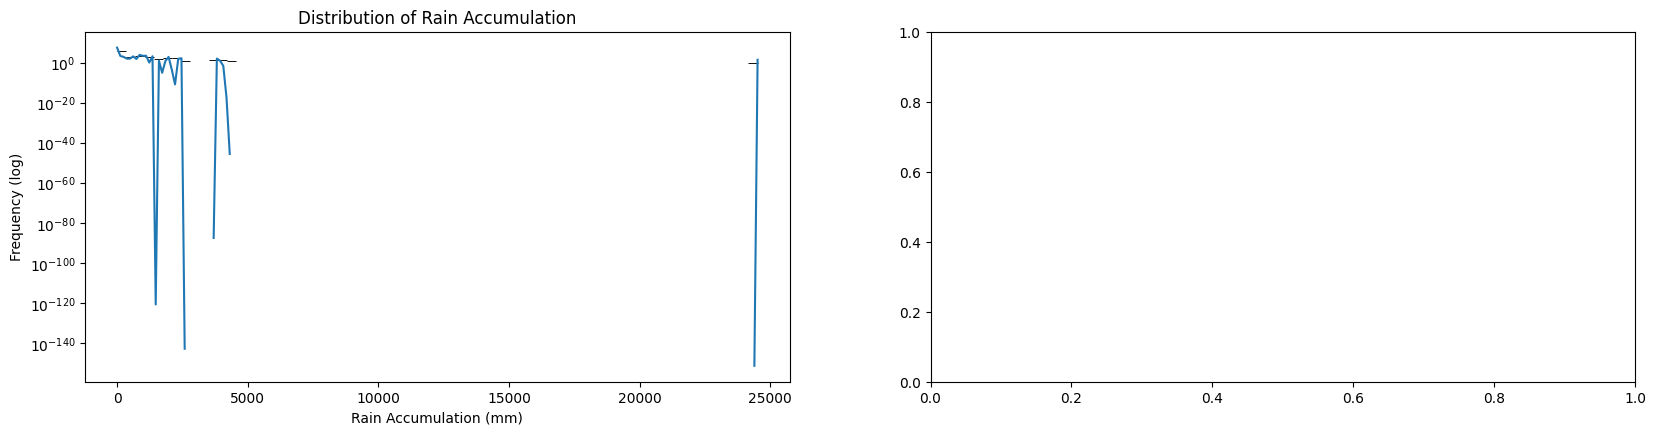

In [8]:

# Set the overall figure size
plt.figure(figsize=(20, 10))

# Subplot 1: Distribution of the target variable 'Expected'
plt.subplot(2, 2, 1)
sns.histplot(train['Expected'], bins=70, kde=True)
plt.title('Distribution of Rain Accumulation')
plt.xlabel('Rain Accumulation (mm)')
plt.ylabel('Frequency')

# Subplot 2: Boxplot for 'DistanceToRadar'
plt.subplot(2, 2, 2)
sns.boxplot(y=train['DistanceToRadar'])
plt.title('Boxplot of Distance to Radar')
plt.ylabel('Distance (km)')

# Subplot 3: Countplot for 'HydrometeorType'
plt.subplot(2, 2, 3)
sns.countplot(x=train['HydrometeorType'])
plt.title('Count of Hydrometeor Types')
plt.xlabel('Hydrometeor Type')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Subplot 4: Scatter plot showing the relationship between 'Reflectivity' and 'Expected'
plt.subplot(2, 2, 4)
sns.scatterplot(x=train['Reflectivity'], y=train['Expected'])
plt.title('Rain Accumulation vs. Reflectivity')
plt.xlabel('Reflectivity (dBZ)')
plt.ylabel('Rain Accumulation (mm)')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### Cleaning and treatment of missing values

We identify and address missing values, replace specific missing data codes with `NaN` for uniform imputation, and consider removing columns with a high proportion of missing values. We also deal with compound columns, splitting them into multiple columns for easier analysis.


In [7]:
# Replace specific missing value codes with NaN
missing_value_codes = [-99000, -99901, -99903, 999.0]
train.replace(missing_value_codes, np.nan, inplace=True)

# Calculate the percentage of missing values for each column
missing_percentage = train.isnull().sum() * 100 / len(train)

# Print the percentage of missing values
print("Percentage of Missing Values:\n", missing_percentage)

# Set a threshold for dropping columns (e.g., 60%)
threshold = 60

# Drop columns with missing value rate higher than threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
train.drop(columns=columns_to_drop, inplace=True)

# Impute missing values for columns with missing value rate lower than threshold
# Here, we use median for numerical columns ¿
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        train[column].fillna(train[column].median(), inplace=True)
    else:
        train[column].fillna(train[column].mode()[0], inplace=True)

# Print the dataframe info to verify changes
print(train.info())


Percentage of Missing Values:
 Id                    0.000000
TimeToEnd             0.000000
DistanceToRadar       0.000000
Composite             0.000000
HybridScan            0.000000
HydrometeorType       0.000000
Kdp                   0.000000
RR1                   0.000000
RR2                   0.000000
RR3                   0.000000
RadarQualityIndex     0.000000
Reflectivity          0.000000
ReflectivityQC        0.000000
RhoHV                 0.000000
Velocity              0.000000
Zdr                   0.000000
LogWaterVolume       13.436568
MassWeightedMean     13.436568
MassWeightedSD       13.436568
Expected              0.000000
dtype: float64


C:\Users\juan_\AppData\Local\Temp\ipykernel_7956\161461304.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].median(), inplace=True)
C:\Users\juan_\AppData\Local\Temp\ipykernel_7956\161461304.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126694 entries, 0 to 1126693
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1126694 non-null  float64
 1   TimeToEnd          1126694 non-null  object 
 2   DistanceToRadar    1126694 non-null  object 
 3   Composite          1126694 non-null  object 
 4   HybridScan         1126694 non-null  object 
 5   HydrometeorType    1126694 non-null  object 
 6   Kdp                1126694 non-null  object 
 7   RR1                1126694 non-null  object 
 8   RR2                1126694 non-null  object 
 9   RR3                1126694 non-null  object 
 10  RadarQualityIndex  1126694 non-null  object 
 11  Reflectivity       1126694 non-null  object 
 12  ReflectivityQC     1126694 non-null  object 
 13  RhoHV              1126694 non-null  object 
 14  Velocity           1126694 non-null  object 
 15  Zdr                1126694 non-n

### Web scrapping